In [ ]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Class 09 Worksheet

## Importing & Profiling the Data
First, import the file, "dataDillionaireShows.csv", and save it in a variable called `dfShows`. Then, do some initial data profiling of the data. 

In [ ]:
import pandas as pd
dfShows = pd.read_csv("dataDillionaireShows.csv")
dfShows

In [ ]:
dfShows.dtypes
dfShows.isna().sum()

In [ ]:
dfShows.describe()

In [ ]:
dfShows["Genre"].value_counts()
dfShows["Genre"].value_counts(normalize = True)

Now import the file, "dataDillionaireWeekly.csv" and save it as `dfWeekly`:

In [ ]:
dfWeekly = pd.read_csv("dataDillionaireWeekly.csv")
dfWeekly

In [ ]:
dfWeekly.dtypes
dfWeekly.isna().sum()

In [ ]:
dfWeekly.describe()
round(dfWeekly.describe(), 2) # here's a way to get rid of scientific notation

In [ ]:
pd.plotting.scatter_matrix(dfWeekly[["PriorWeekMkt", "Viewers"]])

Let's query the `Viewers` column to see what the outlier data is:

In [ ]:
dfWeekly.query("Viewers > 10000000")

4/15/2013 was Marathon Monday, so these were likely all news shows. Let's drop all the data from Marathon Monday (2013-04-15):

In [ ]:
dfWeekly = dfWeekly.query("AirDate != '2013-04-15'")
dfWeekly["Viewers"].plot.hist(bins = 30)

## Merging Datasets

Often, we want to combine data in multiple files. SQL uses joins; the same idea works in python:

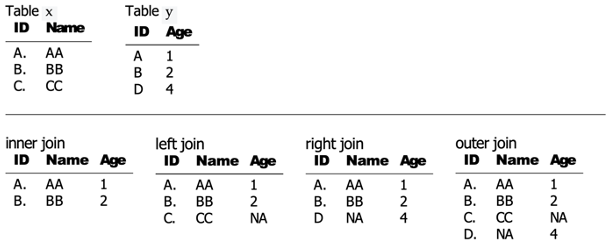

Let's merge the 2 datasets using an outer join:

In [ ]:
dfTotal = pd.merge(dfShows, dfWeekly, how = "outer", on = "ShowId")
dfTotal
dfTotal.dtypes

For merging datasets, how python matches:
* By default, python matches on all columns with the same name
* You can change this using the `on` parameter

Similarities?
* JOIN in SQL
* VLOOKUP in Excel

Multiple matches?
* If a row in the left data matches multiple rows in the right data, all the rows in the right data will be returned, once for each matching row in the left data

### Feature Engineering

Let's add columns for Day and Month, since we might want to use these variables in our models:

In [ ]:
dfTotal["Weekday"] = pd.to_datetime(dfTotal["AirDate"], format = "%Y-%m-%d").dt.day_name()
dfTotal["Month"] = pd.to_datetime(dfTotal["AirDate"], format = "%Y-%m-%d").dt.month_name()
dfTotal

## Summarizing Data

So far, we've counted with `value_counts()`. But often we need more than counts.

Let's use `groupby` to summarize our data:

In [ ]:
dfTotal.groupby("Genre")["Viewers"].sum()

You try...sum the total viewers by day of the week:

We can also use `groupby` when visualizing the data. Copy/paste the code from above and add to it to create a bar chart for Viewers by weekday:

### Multiple Groupings
You can also group by multiple groupings. Just use a list in the `groupby` command:

In [ ]:
dfTotal.groupby(["Genre", "Weekday"])["Viewers"].sum()

Now you try...calculate the sum of the viewers by Genre and Month:

### Additional Metrics
You can calculate more than sums:

In [ ]:
dfTotal.groupby("Genre")["Viewers"].describe()

## Practice Scenario

For this practice scenario, work together with your project groups.

**Use the tools from last week's classes to investigate how effective marketing spending is.**

### Need more challenge?

I'll go through the one analysis with the whole class. But if we're going slow and you'd like more challenge:
* I'll make a linear model. Instead, make a negative binomial model and compare the results
* Compare these results with a random forest model using `RandomForestRegressor` (not `RandomForestClassifier`)
* Consider additional interactions and variable transformations. Which of these improve the model and by how much?